In [1]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle
from torchsummary import summary

In [2]:
if os.path.exists('abalone.data'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/jfiypwq4vxvfy58/abalone.data")

np.random.seed(2)

In [3]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv("abalone.data", names=column_names)

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
np.unique(df['Rings'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
np.unique(df['Sex'])

array(['F', 'I', 'M'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])

# Print the conversion
print("Conversion for Sex column:")
for i, label in enumerate(encoder.classes_):
    print(f"{label} -> {i}")


encoder = LabelEncoder()
df["Rings"] = encoder.fit_transform(df["Rings"])

Conversion for Sex column:
F -> 0
I -> 1
M -> 2


In [10]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,9
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,8
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,9


In [11]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,8.933445
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.222790
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,7.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,8.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,10.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


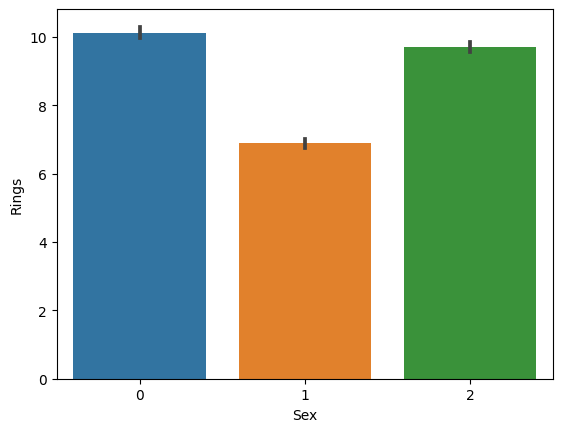

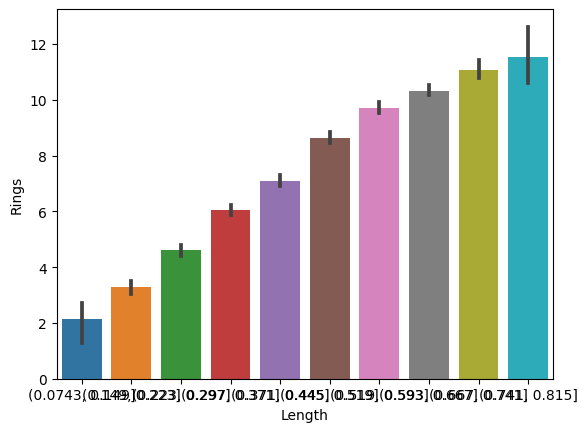

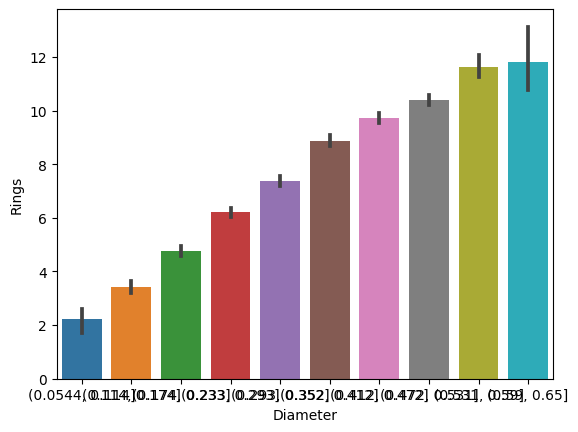

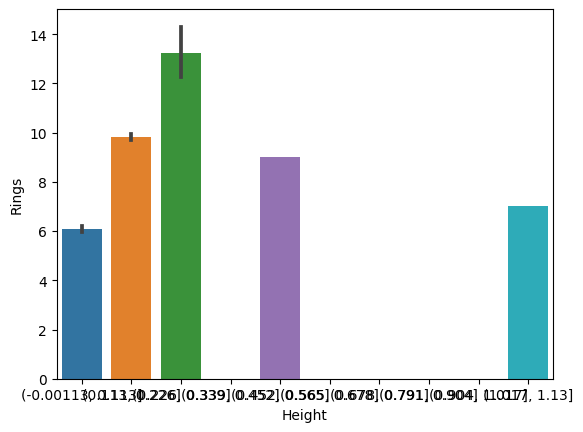

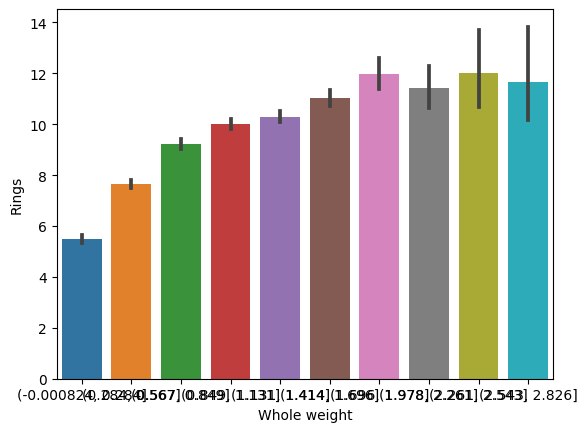

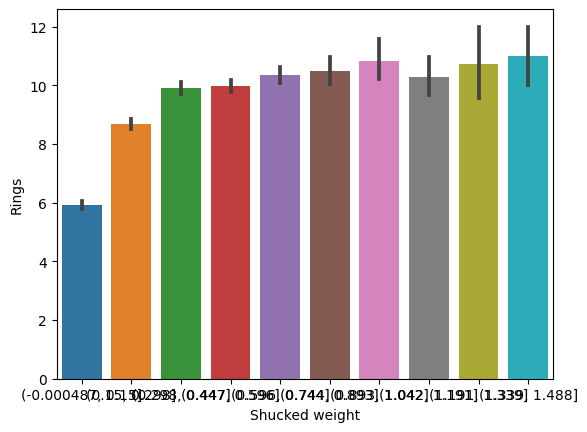

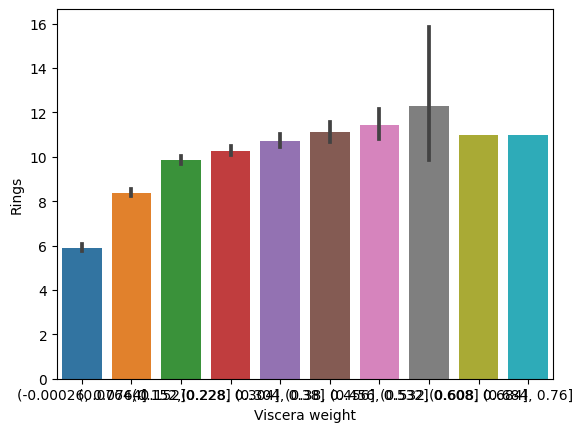

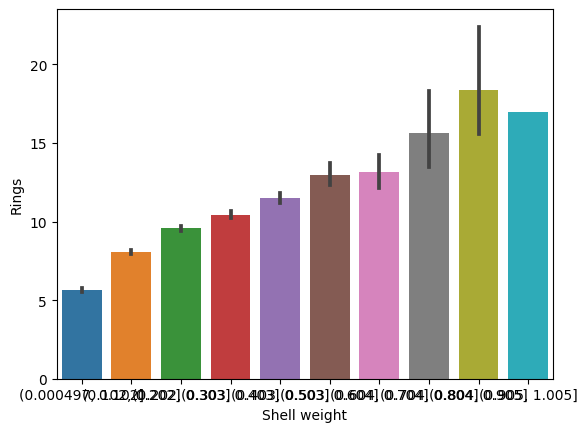

In [12]:
import seaborn as sns
import pandas as pd

# Bar Plots
for column in df.columns[:-1]:  
    plt.figure()
    if column in ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]:
        sns.barplot(x=pd.cut(df[column], bins=10), y="Rings", data=df)
    else:
        sns.barplot(x=column, y="Rings", data=df)
    plt.xlabel(column)
    plt.ylabel("Rings")
    plt.show()

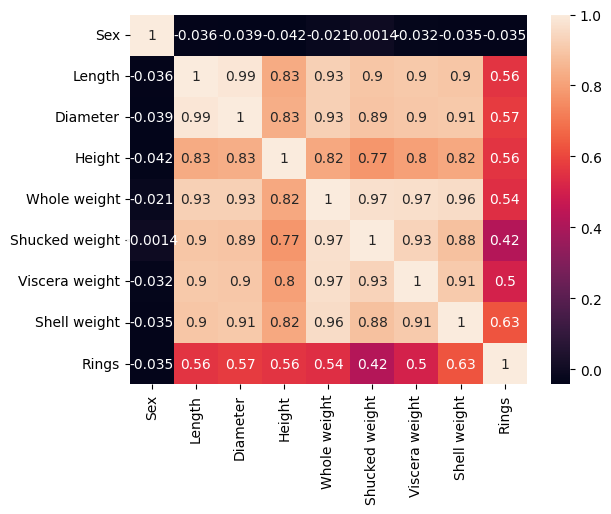

In [13]:
sns.histplot(data=df, x="Rings")

# correlation plot
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# standardization
for col in df.columns[:-1]:
    df[col] = scaler.fit_transform(df[[col]])

In [15]:
unique_values, counts = np.unique(df["Rings"], return_counts=True)
print("Unique_Values:",unique_values)
print("Counts:",counts)

Unique_Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Counts: [  1   1  15  57 115 259 391 568 689 634 487 267 203 126 103  67  58  42
  32  26  14   6   9   2   1   1   2   1]


In [16]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.526454,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,8.933445
std,0.411120,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,3.222790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,7.000000
50%,0.500000,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,8.000000
75%,1.000000,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000


In [17]:
# threshold for pre-taking class and later adding to train
df_preserved = df.copy(deep=True)
threshold = 3
class_counts = df["Rings"].value_counts()
df_temp = pd.DataFrame()

for cls, count in class_counts.items():
    if count < threshold:
        df_temp = df_temp.append(df[df["Rings"]==cls])

# Drop the rows
df = df.drop(df_temp.index)

# TTS with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Rings"], test_size=0.2, stratify=df["Rings"], random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2)

# Merge df_temp and X_train
X_train = pd.concat([X_train, df_temp.drop(["Rings"], axis=1)])
y_train = pd.concat([y_train, df_temp["Rings"]])

<ipython-input-17-bc10486e4eaf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp.append(df[df["Rings"]==cls])
<ipython-input-17-bc10486e4eaf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp.append(df[df["Rings"]==cls])
<ipython-input-17-bc10486e4eaf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp.append(df[df["Rings"]==cls])
<ipython-input-17-bc10486e4eaf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp.append(df[df["Rings"]==cls])
<ipython-input-17-bc10486e4eaf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [18]:
df_temp

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2108,1.0,0.797297,0.806723,0.199115,0.772623,0.506052,0.514154,0.880419,26
2209,0.0,0.641892,0.689076,0.159292,0.428723,0.217552,0.269256,0.521674,26
3149,0.0,0.844595,0.815126,0.190265,0.699841,0.448218,0.410797,0.706029,23
3280,1.0,0.831081,0.815126,0.163717,0.572871,0.357767,0.464121,0.551570,23
236,0.5,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0
294,1.0,0.709459,0.739496,0.172566,0.373827,0.257566,0.249506,0.372197,25
480,0.0,0.844595,0.890756,0.163717,0.639455,0.473773,0.422646,0.471849,27
719,0.5,0.101351,0.075630,0.022124,0.004604,0.002354,0.004608,0.003488,1
2201,0.0,0.770270,0.731092,0.190265,0.497255,0.286147,0.300197,0.506726,24


In [19]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3174,1.0,0.506757,0.504202,0.106195,0.139366,0.098184,0.100066,0.143000
2661,1.0,0.662162,0.630252,0.115044,0.276961,0.234364,0.247531,0.210762
231,1.0,0.662162,0.647059,0.154867,0.318930,0.207801,0.253456,0.322372
247,0.5,0.385135,0.369748,0.075221,0.069240,0.049428,0.053983,0.068261
4154,0.5,0.486486,0.462185,0.084071,0.138481,0.146604,0.098091,0.086697
...,...,...,...,...,...,...,...,...
236,0.5,0.000000,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000
294,1.0,0.709459,0.739496,0.172566,0.373827,0.257566,0.249506,0.372197
480,0.0,0.844595,0.890756,0.163717,0.639455,0.473773,0.422646,0.471849
719,0.5,0.101351,0.075630,0.022124,0.004604,0.002354,0.004608,0.003488


In [20]:
y_train

3174     8
2661     8
231     13
247      8
4154     5
        ..
236      0
294     25
480     27
719      1
2201    24
Name: Rings, Length: 2676, dtype: int64

In [21]:
unique_values, counts = np.unique(y_train, return_counts=True)
print("Class distribution in train set:")
for val, count in zip(unique_values, counts):
    print(f"{val}: {count/len(y_train):.2%}")
    
print()

unique_values, counts = np.unique(y_test, return_counts=True)
print("Class distribution in test set:")
for val, count in zip(unique_values, counts):
    print(f"{val}: {count/len(y_test):.2%}")

Class distribution in train set:
0: 0.04%
1: 0.04%
2: 0.37%
3: 1.38%
4: 2.77%
5: 6.17%
6: 9.34%
7: 13.57%
8: 16.48%
9: 15.13%
10: 11.62%
11: 6.39%
12: 4.82%
13: 3.03%
14: 2.47%
15: 1.61%
16: 1.38%
17: 1.01%
18: 0.78%
19: 0.64%
20: 0.34%
21: 0.15%
22: 0.22%
23: 0.07%
24: 0.04%
25: 0.04%
26: 0.07%
27: 0.04%

Class distribution in test set:
2: 0.36%
3: 1.32%
4: 2.76%
5: 6.24%
6: 9.35%
7: 13.67%
8: 16.55%
9: 15.23%
10: 11.75%
11: 6.35%
12: 4.92%
13: 3.00%
14: 2.52%
15: 1.56%
16: 1.44%
17: 0.96%
18: 0.72%
19: 0.60%
20: 0.36%
21: 0.12%
22: 0.24%


In [22]:
num_labels = len(np.unique(df_preserved["Rings"]))
print(num_labels)

28


In [23]:
# # Apply one-hot encoding
# y_one_hot_train = np.eye(num_labels)[np.array(y_train).astype(int).reshape(1,-1)]
# y_reshaped_train = y_one_hot_train.reshape(-1, num_labels)

# y_one_hot_test = np.eye(num_labels)[np.array(y_test).astype(int).reshape(1,-1)]
# y_reshaped_test = y_one_hot_test.reshape(-1, num_labels)

# y_one_hot_val = np.eye(num_labels)[np.array(y_val).astype(int).reshape(1,-1)]
# y_reshaped_val = y_one_hot_val.reshape(-1, num_labels)

In [48]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, input_dim, num_labels):
        super(Net, self).__init__()
        self.layer_1 = torch.nn.Linear(input_dim, 128)  
        self.activation_1 = torch.nn.Tanh() 
        self.layer_2 = torch.nn.Linear(input_dim, 128) 
        self.activation_2 = torch.nn.Tanh()
        self.layer_3 = torch.nn.Linear(128, num_labels)   
        self.activation_3 = torch.nn.Sigmoid()

    def forward(self, x):
        x1 = x
        x2 = x
        x_1_out = self.activation_1(self.layer_1(x1))      
        x_2_out = self.activation_2(self.layer_2(x2))  
        x = x_1_out+x_2_out                                         
        x = self.activation_3(self.layer_3(x))                
        return x

model = Net(X_train.shape[1],num_labels)
summary(model,X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 2676, 128]           1,152
              Tanh-2            [-1, 2676, 128]               0
            Linear-3            [-1, 2676, 128]           1,152
              Tanh-4            [-1, 2676, 128]               0
            Linear-5             [-1, 2676, 28]           3,612
           Sigmoid-6             [-1, 2676, 28]               0
Total params: 5,916
Trainable params: 5,916
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 11.60
Params size (MB): 0.02
Estimated Total Size (MB): 11.70
----------------------------------------------------------------


In [50]:
X_train.shape

(2676, 8)

In [51]:
def get_accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [64]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_func = torch.nn.CrossEntropyLoss()  

In [65]:
import matplotlib.pyplot as plt

batch_size = 8
num_epochs = 250
batch_no = len(X_train) // batch_size

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(num_epochs):
    X_train, y_train = shuffle(X_train, y_train)

    # Evaluate on validation set
    with torch.no_grad():
        model.eval()
        val_inputs = Variable(torch.FloatTensor(X_val.values))
        val_labels = Variable(torch.LongTensor(y_val.values))
        val_outputs = model(val_inputs)
        val_loss_value = loss_func(val_outputs, val_labels)
        val_acc_value = get_accuracy(val_outputs, val_labels, len(X_val))
        val_loss.append(val_loss_value)
        val_acc.append(val_acc_value)

    # Train on training set
    model.train()
    train_batch_loss = []
    train_batch_acc = []
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train.values[start:end]))
        labels = Variable(torch.LongTensor(y_train.values[start:end]))

        optimizer.zero_grad()

        # forward -> backward -> optimize
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        train_batch_loss.append(loss.item())
        acc = get_accuracy(outputs, labels, batch_size)
        train_batch_acc.append(acc)

    train_loss_value = sum(train_batch_loss) / len(train_batch_loss)
    train_acc_value = sum(train_batch_acc) / len(train_batch_acc)
    train_loss.append(train_loss_value)
    train_acc.append(train_acc_value)

    print(f"Epochs: {epoch+1}, Train Loss: {train_loss_value:.4f}, Train Acc: {train_acc_value:.4f}, Val Loss: {val_loss_value:.4f}, Val Acc: {val_acc_value:.4f}")

Epochs: 1, Train Loss: 2.7192, Train Acc: 18.0763, Val Loss: 2.7481, Val Acc: 18.4408
Epochs: 2, Train Loss: 2.7187, Train Acc: 18.0015, Val Loss: 2.7483, Val Acc: 18.2909
Epochs: 3, Train Loss: 2.7188, Train Acc: 18.0389, Val Loss: 2.7485, Val Acc: 18.5907
Epochs: 4, Train Loss: 2.7187, Train Acc: 18.0015, Val Loss: 2.7485, Val Acc: 18.4408
Epochs: 5, Train Loss: 2.7188, Train Acc: 18.0015, Val Loss: 2.7484, Val Acc: 18.1409
Epochs: 6, Train Loss: 2.7187, Train Acc: 18.0389, Val Loss: 2.7482, Val Acc: 18.7406
Epochs: 7, Train Loss: 2.7182, Train Acc: 17.9641, Val Loss: 2.7483, Val Acc: 18.7406
Epochs: 8, Train Loss: 2.7186, Train Acc: 17.8518, Val Loss: 2.7486, Val Acc: 18.2909
Epochs: 9, Train Loss: 2.7187, Train Acc: 17.8892, Val Loss: 2.7484, Val Acc: 18.4408
Epochs: 10, Train Loss: 2.7187, Train Acc: 18.0389, Val Loss: 2.7483, Val Acc: 18.7406
Epochs: 11, Train Loss: 2.7187, Train Acc: 17.9266, Val Loss: 2.7485, Val Acc: 18.2909
Epochs: 12, Train Loss: 2.7187, Train Acc: 17.8892, 

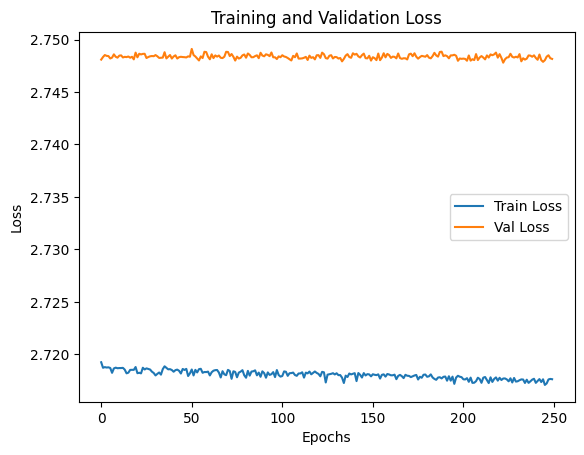

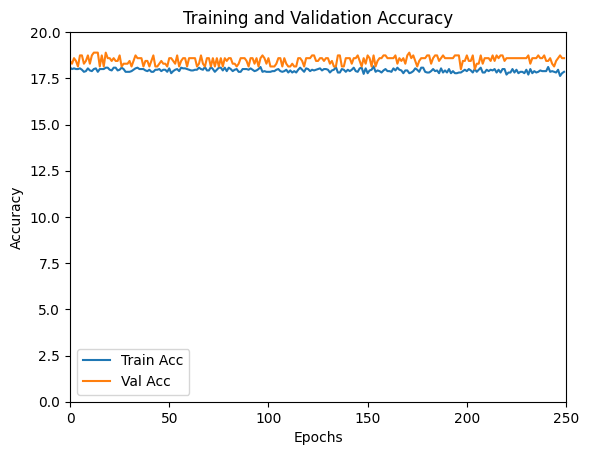

In [69]:
# plot train and val loss
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot train and val accuracy
plt.plot(train_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0, 20.0])  # set y-axis limits
plt.xlim([0, num_epochs])  # set x-axis limits
plt.show()

In [71]:
# Evaluate on test set
with torch.no_grad():
    model.eval()
    test_inputs = Variable(torch.FloatTensor(X_test.values))
    test_labels = Variable(torch.LongTensor(y_test.values))
    test_outputs = model(test_inputs)
    test_acc = get_accuracy(test_outputs, test_labels, len(X_test))
    print(f"Test Acc: {test_acc}")

Test Acc: 17.625898361206055
